In [53]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import pearsonr

In [6]:
consumer_key = "aHuECgaeyF6mFL4XSDzDDvy8Y"
consumer_secret = "7vp170Fgrc22uNNZhx7QPONbXwKcTdvOeyTGh88dtiE5swsUvG"
access_token = "2691294434-6o1eNJmQmMTGgzNwOW4raK7CXlo77tWL11HPNmd"
access_token_secret = "8aRTNuXzsRfG5hqZxmi4mUGE7pruipICkTC67gwasM56W"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user = api.me()
print(user.name)

RS


In [7]:
tweets = []

for page in range(1,5):
    tweets.extend(api.user_timeline(screen_name="JoeBiden", count=200, page=page))
    
print(f'Number of tweets extracted {len(tweets)}. \n')

Number of tweets extracted 800. 



In [8]:
own_tweets = [tweet for tweet in tweets if tweet.retweeted == False and 'RT @' not in tweet.text]
# for tweet in own_tweets[:5]:
#     print(tweet.text)
    
df = pd.DataFrame(data=[[tweet.created_at, tweet.text, len(tweet.text), tweet.id, tweet.favorite_count, tweet.retweet_count] for tweet in own_tweets], columns=['Date', 'Tweet', 'Len', 'ID', 'Likes', 'Retweets'])
df.head()

,Date,Tweet,Len,ID,Likes,Retweets
0,2021-07-04 13:46:06,America is coming back—together. https://t.co/...,56,1411682736859910153,22219,2945
1,2021-07-03 15:05:01,Over 300 million shots administered.\nChecks d...,140,1411340208705097734,50836,5632
2,2021-07-02 15:51:44,Help us mark our independence from this virus—...,61,1410989575732961286,75950,7727
3,2021-07-01 20:20:47,The science is clear: The best way to protect ...,140,1410694898601316359,42970,5454
4,2021-06-30 15:50:54,.@TheDemocrats are mobilizing volunteers and o...,140,1410264588730482691,5284,893


In [9]:
df[df['Likes']==df['Likes'].max()]

,Date,Tweet,Len,ID,Likes,Retweets
88,2021-01-20 14:20:00,It’s a new day in America.,26,1351897267666608129,4154422,498984


In [10]:
df['Likes'].describe()

count    5.330000e+02
mean     1.938178e+05
std      3.279096e+05
min      5.284000e+03
25%      3.641200e+04
50%      8.220500e+04
75%      2.210020e+05
max      4.154422e+06
Name: Likes, dtype: float64

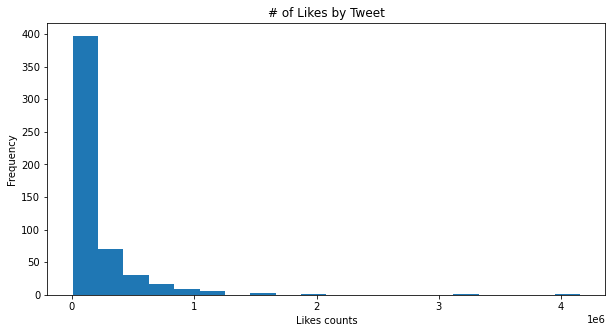

In [11]:
df['Likes'].plot(kind='hist', bins=20, figsize=(10,5))
plt.xlabel('Likes counts')
plt.ylabel('Frequency')
plt.title('# of Likes by Tweet')
plt.show()

In [12]:
vader = SentimentIntensityAnalyzer()
f = lambda tweet: vader.polarity_scores(tweet)['compound']
df['Sentiment'] = df['Tweet'].apply(f)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Tweet,Len,ID,Likes,Retweets,Sentiment
0,2021-07-04 13:46:06,America is coming back—together. https://t.co/...,56,1411682736859910153,22219,2945,0.0000
1,2021-07-03 15:05:01,Over 300 million shots administered.\nChecks d...,140,1411340208705097734,50836,5632,0.0000
2,2021-07-02 15:51:44,Help us mark our independence from this virus—...,61,1410989575732961286,75950,7727,0.4019
3,2021-07-01 20:20:47,The science is clear: The best way to protect ...,140,1410694898601316359,42970,5454,0.8555
4,2021-06-30 15:50:54,.@TheDemocrats are mobilizing volunteers and o...,140,1410264588730482691,5284,893,0.4215


In [58]:
df[df['Sentiment']==df['Sentiment'].min()]

,Date,Tweet,Len,ID,Likes,Retweets,Sentiment
390,2020-11-13 21:05:00,Today marks five years since the horrific ISIS...,140,1327356814552305664,210921,15181,-0.9501


In [13]:
df['Sentiment'].describe()

count    533.000000
mean       0.171724
std        0.411881
min       -0.950100
25%        0.000000
50%        0.000000
75%        0.493900
max        0.913600
Name: Sentiment, dtype: float64

Text(0.5, 1.0, 'Sentiment of Tweets')

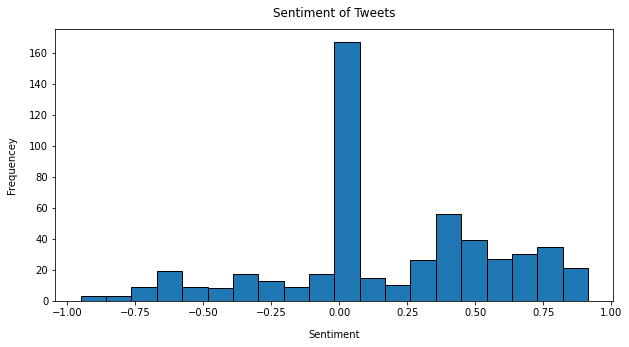

In [14]:
df['Sentiment'].plot(kind='hist', bins=20, ec='black', figsize=(10,5))
plt.xlabel('Sentiment', labelpad=12)
plt.ylabel('Frequencey', labelpad=12)
plt.title('Sentiment of Tweets', pad=12)

Text(0.5, 1.0, 'Daily Average Sentiment')

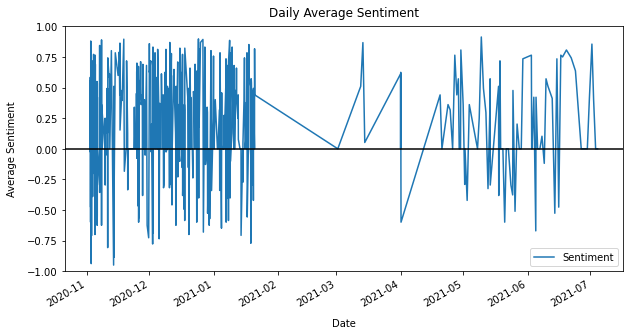

In [15]:
date_df = df.groupby(['Date']).mean().reset_index()

date_df.plot(kind='line', x='Date', y='Sentiment', figsize=(10,5), ylim=(-1,1))
plt.axhline(y=0, color='black')
plt.ylabel('Average Sentiment', labelpad=10)
plt.xlabel('Date', labelpad=10)
plt.title('Daily Average Sentiment', pad=10)

In [16]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(text for text in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(['HTTPS', "CO", "COM", "BOOK", 'YOUTUBE', 'PODCAST', "T", "S"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

Pearsons correlation: 0.055


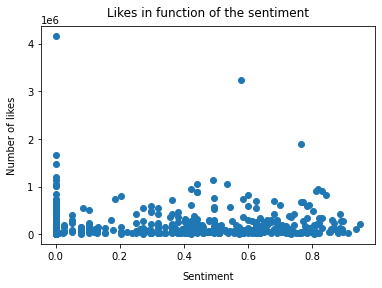

In [55]:
plt.scatter((abs(df['Sentiment'])), df['Likes'])

plt.ylabel('Number of likes', labelpad=10)
plt.xlabel('Sentiment', labelpad=10)
plt.title('Likes in function of the sentiment', pad=10)

#pearson coefficient
corr, _ = pearsonr(df['Sentiment'], df['Likes'])
print('Pearsons correlation: %.3f' % corr)


Text(0.5, 1.0, 'Likes in function of the length of the tweet')

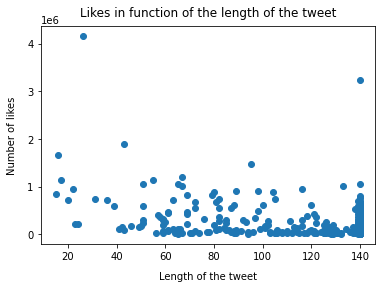

In [18]:
plt.scatter(df['Len'], df['Likes'])

plt.ylabel('Number of likes', labelpad=10)
plt.xlabel('Length of the tweet', labelpad=10)
plt.title('Likes in function of the length of the tweet', pad=10)

Text(0.5, 1.0, 'Likes in function of the number of retweets')

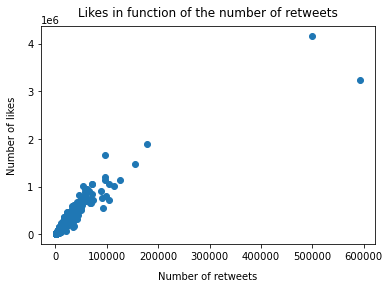

In [19]:
plt.scatter(df['Retweets'], df['Likes'])

plt.ylabel('Number of likes', labelpad=10)
plt.xlabel('Number of retweets', labelpad=10)
plt.title('Likes in function of the number of retweets', pad=10)

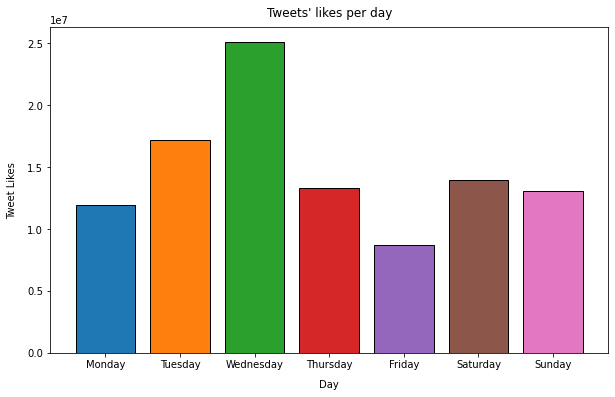

In [20]:
import datetime

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Day", labelpad=10)
plt.ylabel("Tweet Likes", labelpad=10)
plt.title('Tweets\' likes per day', pad=10)

t = {
    'Monday':0,
    'Tuesday':0,
    'Wednesday':0,
    'Thursday':0,
    'Friday':0,
    'Saturday':0,
    'Sunday':0
}

c = 0
for date in df['Date']:
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    day = date.weekday()
    t[day_name[day]] += df['Likes'][c]
    c += 1

for day, likes in t.items():
    ax.bar(day, likes, ec='black')

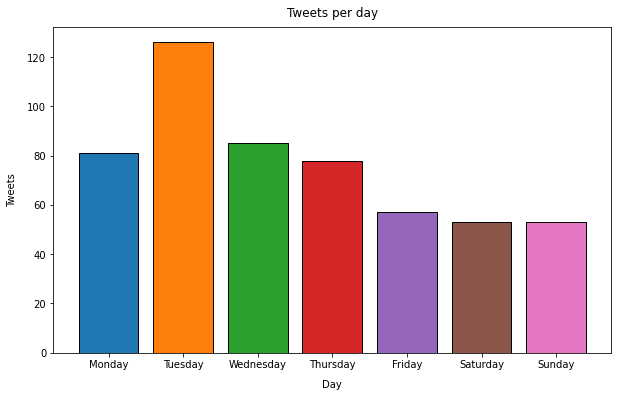

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Day", labelpad=10)
plt.ylabel("Tweets", labelpad=10)
plt.title('Tweets per day', pad=10)

t = {
    'Monday':0,
    'Tuesday':0,
    'Wednesday':0,
    'Thursday':0,
    'Friday':0,
    'Saturday':0,
    'Sunday':0
}

for date in df['Date']:
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    day = date.weekday()
    t[day_name[day]] += 1

for day, likes in t.items():
    ax.bar(day, likes, ec='black')

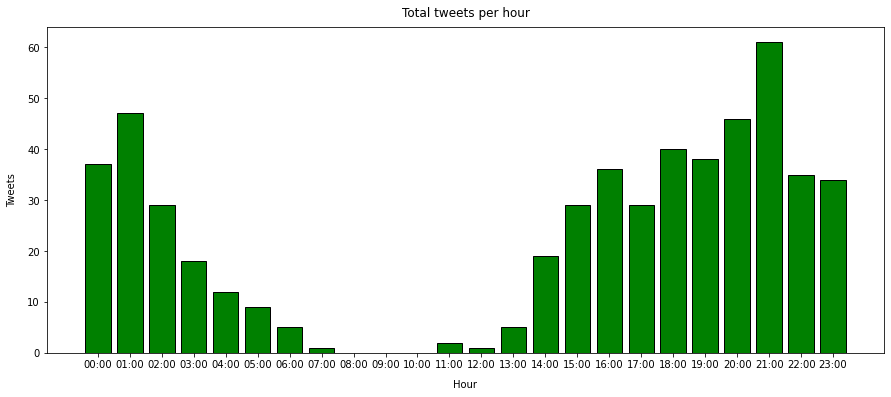

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.xlabel("Hour", labelpad=10)
plt.ylabel("Tweets", labelpad=10)
plt.title('Total tweets per hour', pad=10)

times = {}

for i in range(24):
    if i < 10:
        time = f'0{i}:00'
    else:
        time = f'{i}:00'
        
    times[time] = 0    

for date in df['Date']:
    
    if (len(str(date.time().hour))) == 1:
        time = f'0{date.time().hour}:00'

    else:  
        time = f'{date.time().hour}:00'
    
    times[time] += 1
        
for time, freq in times.items():
    plt.bar(time, freq, ec='black', color="g")

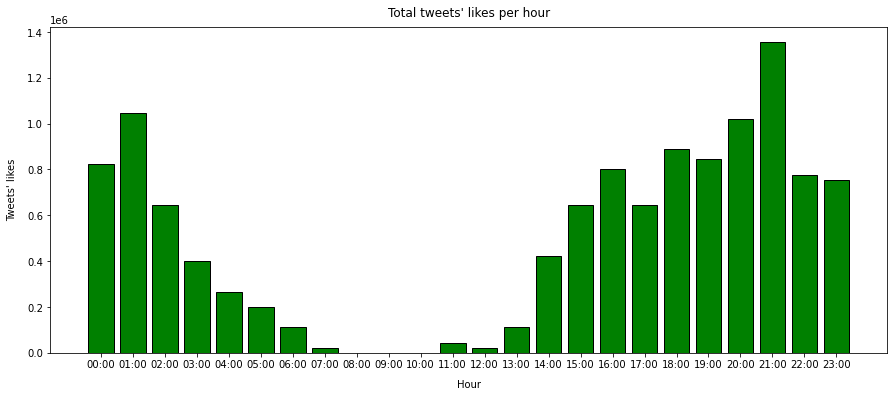

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.xlabel("Hour", labelpad=10)
plt.ylabel("Tweets\' likes", labelpad=10)
plt.title('Total tweets\' likes per hour', pad=10)

times = {}

for i in range(24):
    if i < 10:
        time = f'0{i}:00'
    else:
        time = f'{i}:00'
        
    times[time] = 0    

c = 0
for date in df['Date']:
    
    if (len(str(date.time().hour))) == 1:
        time = f'0{date.time().hour}:00'

    else:  
        time = f'{date.time().hour}:00'
    
    times[time] += df['Likes'][c]
        
for time, freq in times.items():
    plt.bar(time, freq, ec='black', color="g")

Pearsons correlation: 0.928


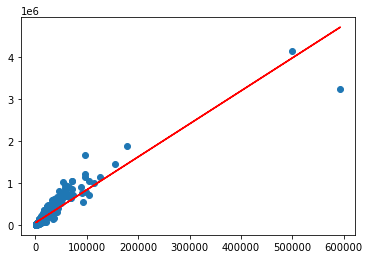

In [49]:
from sklearn.linear_model import LinearRegression

#linear regression 
X = df['Retweets'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['Likes'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#pearson coefficient
corr, _ = pearsonr(df['Retweets'], df['Likes'])
print('Pearsons correlation: %.3f' % corr)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Pearsons correlation: -0.391


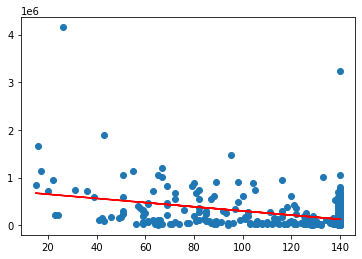

In [51]:
X = df['Len'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df['Likes'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#pearson correlation
corr, _ = pearsonr(df['Len'], df['Likes'])
print('Pearsons correlation: %.3f' % corr)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

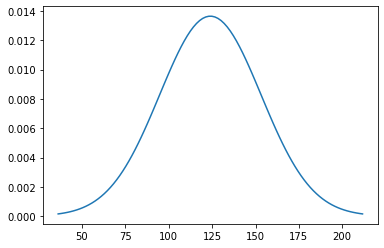

In [56]:
#normal distribution
import scipy.stats as stats
import math

mu = df['Len'].mean()
sigma = df['Len'].std()
variance = (sigma)**(1/2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [1]:
# likes/nb tweet per day

fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel("Day", labelpad=10)
plt.ylabel("Average tweet Likes", labelpad=10)
plt.title('Averagw tweets\' likes per day', pad=10)

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

# nb likes
a = {
    'Monday':0,
    'Tuesday':0,
    'Wednesday':0,
    'Thursday':0,
    'Friday':0,
    'Saturday':0,
    'Sunday':0
}

c = 0
for date in df['Date']:
    day = date.weekday()
    a[day_name[day]] += df['Likes'][c]
    c += 1

# nb tweets
b = {
    'Monday':0,
    'Tuesday':0,
    'Wednesday':0,
    'Thursday':0,
    'Friday':0,
    'Saturday':0,
    'Sunday':0
}

for date in df['Date']:
    day = date.weekday()
    b[day_name[day]] += 1

lst = [ a [ day_name[i] ] / b [ day_name[i] ] for i in range(7)]

for i in range(len(lst)):
    plt.bar(day_name[i], lst[i], ec='black')


NameError: name 'plt' is not defined